# Валидация метрики для оценки разницы между сейсмограммами

In [1]:
import sys
sys.path.append('..')

from functools import reduce

import pandas as pd

from seismicpro.batchflow import Dataset
from seismicpro.src import SeismicBatch, FieldIndex #, seismic_plot

from utils import get_cv, draw_modifications_dist, get_modifications_list, validate_all

## Процедура получения метрики

**Расстояние между двумя спектрограммами** с равным количеством трасс и отсчетов будем вычислять по следующей процедуре

* Выбрать область из 10% трасс с наименьшим офсетом, ограничить вычисления только в этой области
* Получить спектральную плотность мощности с помощью оконного преобразования Фурье для каждой трассы для обеих спектрограмм
* Для соответствующих значений сдвигов окна по времени и соответсвующих трасс вычислить разницу спектров в разных спектрограммах по формуле
$$
Dist(A_1, A_2) = \sum_{f}\left|{A_{1}[f]-A_{2}[f]}\right|
$$
* Усреднить полученные значения по всем трассам и всем сдвигам окна по времени

![Seismogram difference metrics](Seismogram_difference_metrics.png)

## Заргузка данных

In [2]:
base_path = '/notebooks/egor/geolog/notebooks/processed/'  # /notebooks/tonya/gpn_metrics_study/SeismicPro/metrics_study/unet_att_results/models_output

# Датасет 1

In [5]:
paths = {
    'lift': '/notebooks/egor/noise_dataset_1/DN02B_SHOTS_LIFT1.sgy',
    'raw': '/notebooks/egor/noise_dataset_1/DN02A_LIFT_AMPSCAL.sgy',
    'm_1': base_path + 'ds1_ds1.sgy',
    'm_2': base_path + 'ds2_ds1.sgy',
    'm_3': base_path + 'ds3_ds1.sgy',
}

scale_lift = 1

### Количество филдов в данных

In [6]:
%%time

field_index = reduce(lambda x, y: x.merge(y), 
                     (FieldIndex(name=name, path=path, extra_headers=['offset']) for name, path in paths.items()))
print(len(field_index))

51
CPU times: user 2.16 s, sys: 6.77 s, total: 8.93 s
Wall time: 41.9 s


In [7]:
%%time

batch = (Dataset(field_index, SeismicBatch)
         .next_batch(len(field_index))
         .load(fmt='segy', components=tuple(paths.keys())))

../seismicpro/batchflow/batchflow/batch.py:297: UserWarning: All batch data is erased
  warnings.warn("All batch data is erased")


CPU times: user 33.1 s, sys: 32.2 s, total: 1min 5s
Wall time: 1min 5s


## Расчет метрики отностительно LIFT

In [9]:
%%time

res = validate_all(batch, scale_lift=scale_lift)
df = pd.DataFrame(res)
df.to_csv('unet_att_results/test_d1.csv')

CPU times: user 12.4 s, sys: 2.62 s, total: 15 s
Wall time: 15 s


In [10]:
df.head()

,LIFT,M_1,M_2,M_3,RAW
0,0.0,1.302775,13.353552,13.513022,37.275230
1,0.0,1.346804,9.495929,8.360824,102.046661
2,0.0,1.904083,20.427046,18.811398,59.836472
3,0.0,2.135219,20.168251,19.885483,40.233143
4,0.0,0.801493,8.503283,8.427192,34.394463


In [11]:
df.to_csv('unet_att_results/test_d1.csv')

# Датасет 2

In [13]:
paths = {
    'lift': '/data/NA/noise_dataset_2/D02_Lift_SP.sgy',
    'raw': '/data/NA/noise_dataset_2/D01_for_Lift.sgy',
    'm_1': base_path + 'ds1_ds2.sgy',
    'm_2': base_path + 'ds2_ds2.sgy',
    'm_3': base_path + 'ds3_ds2.sgy',
}

scale_lift = 2.3182

### Количество филдов в данных

In [14]:
%%time

field_index = reduce(lambda x, y: x.merge(y), 
                     (FieldIndex(name=name, path=path, extra_headers=['offset']) for name, path in paths.items()))
print(len(field_index))

91
CPU times: user 1.32 s, sys: 2.18 s, total: 3.49 s
Wall time: 13.1 s


In [15]:
%%time

batch = (Dataset(field_index, SeismicBatch)
         .next_batch(len(field_index))
         .load(fmt='segy', components=tuple(paths.keys())))

CPU times: user 14.6 s, sys: 12.7 s, total: 27.3 s
Wall time: 27.3 s


## Расчет метрики отностительно LIFT

In [16]:
%%time

res = validate_all(batch, scale_lift=scale_lift)
df = pd.DataFrame(res)

df.to_csv('unet_att_results/test_d2.csv')

CPU times: user 4.28 s, sys: 180 ms, total: 4.46 s
Wall time: 4.46 s


# Датасет 3

In [17]:
paths = {
    'lift': '/notebooks/egor/noise_dataset_3/5_NA-gr_output_lift5.sgy',
    'raw': '/notebooks/egor/noise_dataset_3/5_NA-gr_input_raw.sgy',
    'm_1': base_path + 'ds1_ds3.sgy',
    'm_2': base_path + 'ds2_ds3.sgy',
    'm_3': base_path + 'ds3_ds3.sgy',
}

scale_lift = 0.000558

### Количество филдов в данных

In [18]:
%%time

field_index = reduce(lambda x, y: x.merge(y), 
                     (FieldIndex(name=name, path=path, extra_headers=['offset']) for name, path in paths.items()))
print(len(field_index))

201
CPU times: user 8.31 s, sys: 19.1 s, total: 27.4 s
Wall time: 1min 29s


In [19]:
%%time

batch = (Dataset(field_index, SeismicBatch)
         .next_batch(len(field_index))
         .load(fmt='segy', components=tuple(paths.keys())))

CPU times: user 2min 56s, sys: 2min 48s, total: 5min 44s
Wall time: 7min 55s


## Расчет метрики отностительно LIFT

In [20]:
%%time

res = validate_all(batch, scale_lift=scale_lift)
df = pd.DataFrame(res)

df.to_csv('unet_att_results/test_d3.csv')

CPU times: user 56.5 s, sys: 16.9 s, total: 1min 13s
Wall time: 1min 13s


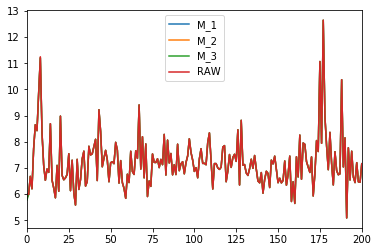

In [21]:
df[['M_1', 'M_2', 'M_3', 'RAW']].plot()

In [22]:
res2 = [{c: np.max(np.abs(batch.__getattr__(c)[i] * s - batch.lift[i] * scale_lift)) 
        for c, s in zip(('m_1', 'm_2', 'm_3', 'raw'), (1, 1, 1, scale_lift))}
        for i in range(len(batch.index))]

df2 = pd.DataFrame(res2)

df2.head()

,m_1,m_2,m_3,raw
0,10.311097,10.311097,10.311097,13.905980
1,7.750843,7.750843,7.750843,22.506874
2,11.925586,11.925586,11.925586,11.925591
3,9.907780,8.933208,8.933208,15.368940
4,9.033056,9.033056,9.033056,9.033056


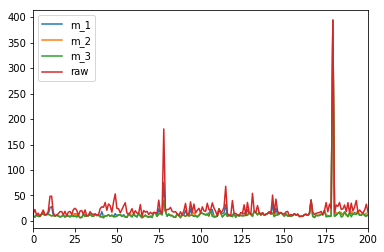

In [23]:
df2.plot()